### Installing of Requirements (only run this if you haven't installed the necessary libraries found in requirements.txt)

In [1]:
# !pip install -r requirements.txt

In [2]:
import geopandas as  gpd
import os
import pandas as pd

Todo
- convert all geojson files into 1 geodataframe 
- data cleaning
- clip the inputs onto the map layer, similar to getting the intersection between the points and the map layer
- return the output onto a file
- write documentation in this notebook if necessary

### Reading the Paranaque Images and Saving a compiled GEOJSON file of the images 

In [3]:
# Accessing the data of Paranque images
paranaque_json_dir = 'data/paranaque'

os.chdir(paranaque_json_dir)

In [4]:
gdf_list = []
geojson_Count = 0

In [5]:
for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            
            
        # gdf_list.append(gdf)

In [6]:
# Run this if you want to view the compiled json

# gdf_list

### Saving the compiled images into a GeoDataFrame in a GEOJSON file

In [7]:
# output_dir = 'output_geojson'
# os.makedirs(output_dir, exist_ok=True)

# merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
# output_filename = 'output_geojson/merged_paranaque.geojson'
# merged_gdf.to_file(output_filename, driver='GeoJSON')
# print(f"Saved {output_filename}")

#the file is found in a folder that can be viewed in the data/paranaque folder as "output_geojson"

In [8]:
# %pip install imagehash

In [9]:
import os
import pandas as pd
import geopandas as gpd
from PIL import Image
import imagehash

def hash_image(file_path):
    """
    Compute a hash for an image file.
    """
    with Image.open(file_path) as img:
        return imagehash.average_hash(img)

def filter_similar_images(gdf_list):
    """
    Filter out similar images based on their hash.
    """
    filtered_gdf_list = []
    hash_set = set()

    for gdf in gdf_list:
        file_path = gdf['thumb_2048_url']  # Replace 'your_image_column' with the column containing image file paths
        file_hash = hash_image(file_path)

        if file_hash not in hash_set:
            hash_set.add(file_hash)
            filtered_gdf_list.append(gdf)

    return filtered_gdf_list

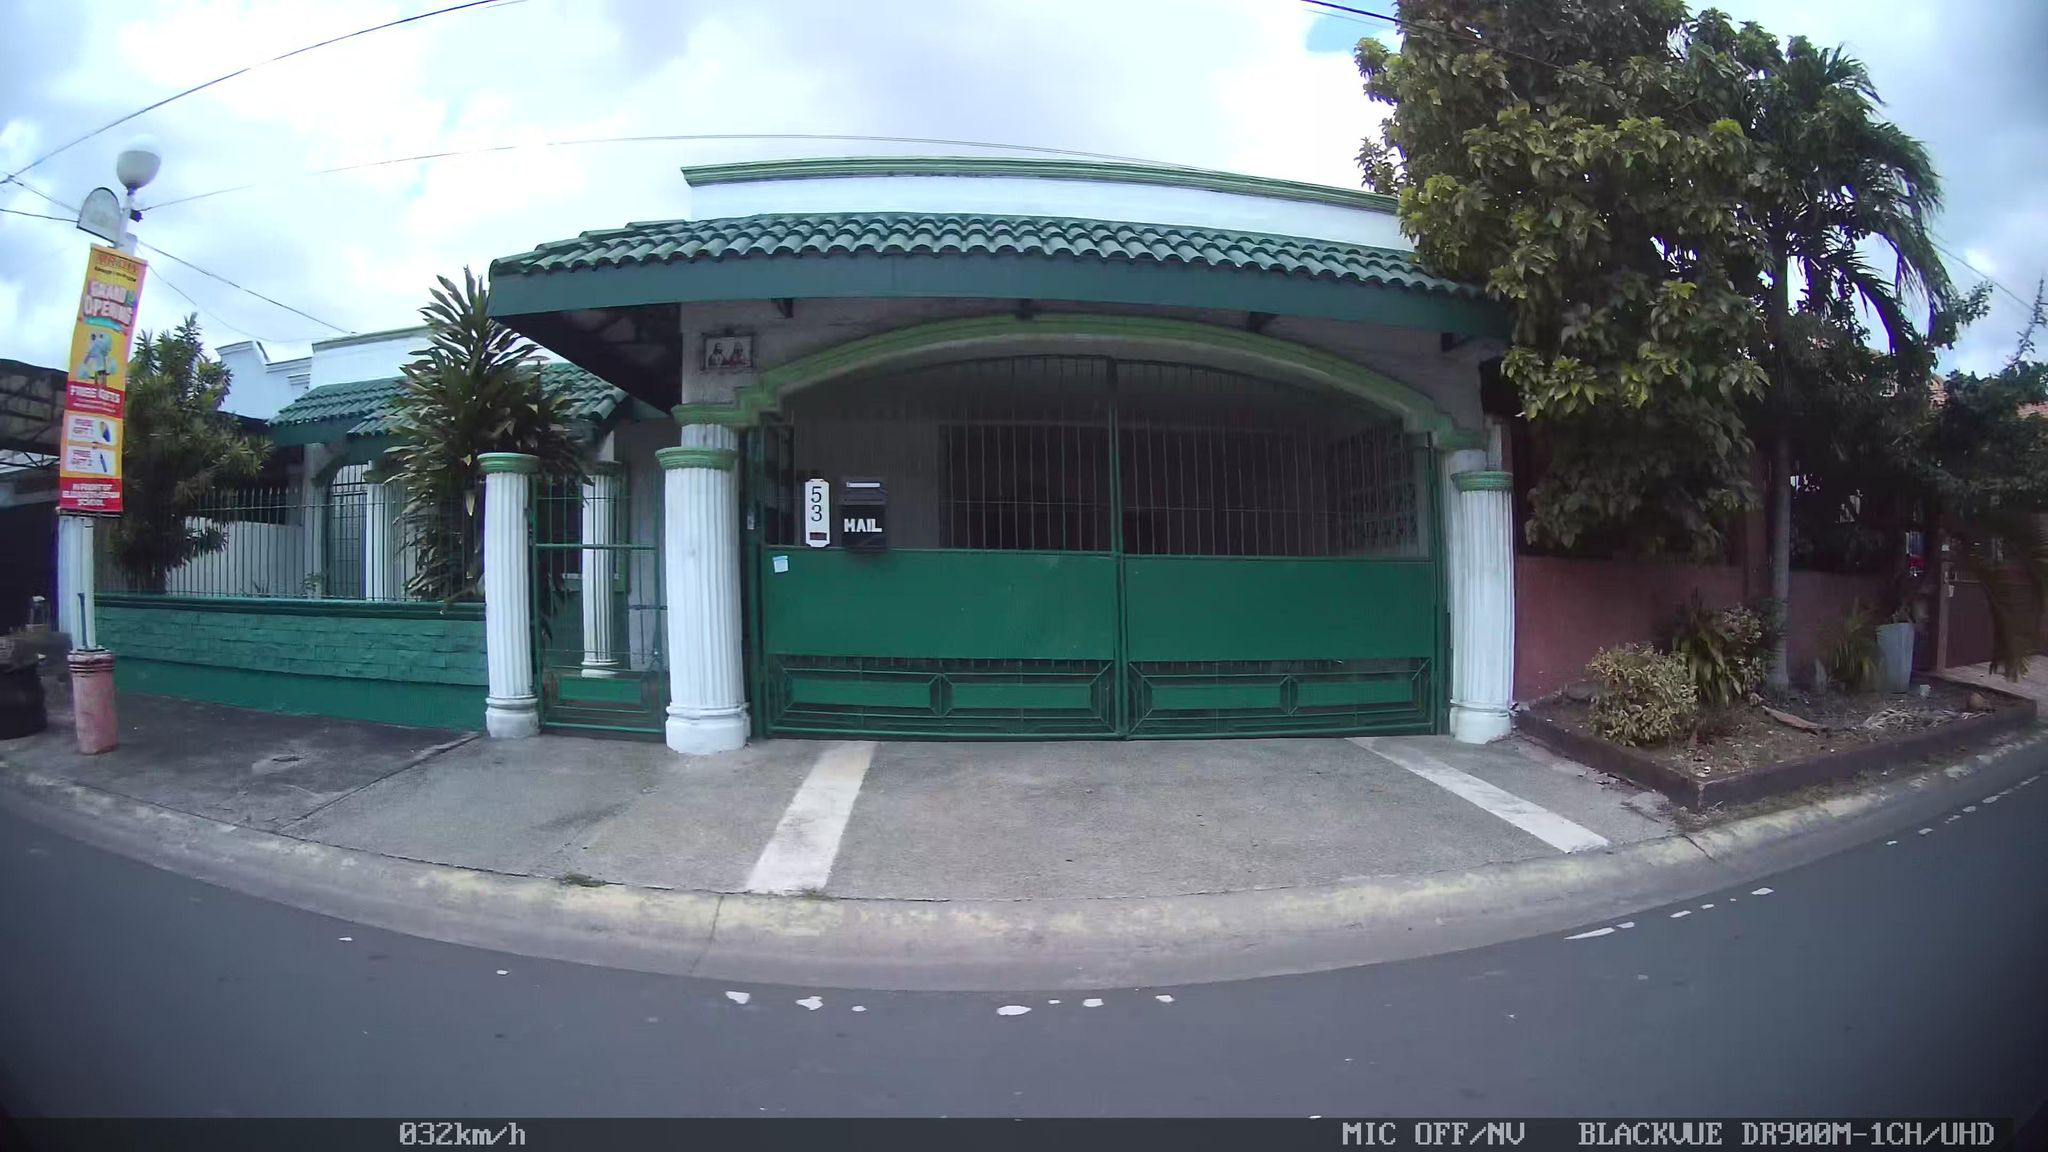

fdfdc000207e7c00
ffff4101100e0000
15


In [10]:
# from PIL import Image
# import requests
# from io import BytesIO

# url145_2 = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An9cxUlW_AayC--U1c1tXtigRWBRepZES4Saq31GZPPfI_1kASse71rEi1aHOXJg7PgemaXitnPVZj7-Gu3DCgPYpqEpwxl8xyqfFQExorMuMYfThwfTk1o7hkNvHVDmUNNzmOxxMihFXrV1DWZbUQ?stp=s2048x1152&ccb=10-5&oh=00_AfABtAA7BtX7l74UEQ9ZLtj1PaNJfoLMuund6A1JT3mVIQ&oe=65B3421E&_nc_sid=201bca"
# url145_x = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An_KYEqGfSXn0q4WRrqa5yKMBoBGH2ASguDbtT_RWVlbONyd3wa2GQn_D2n5o1hEzzh3HJjCCRpBnakmbUbOvOxrjKhCTQD0j14SK0uibENIo5H0O_Ma6KpP2rF1TbgEreu3R2Ukib0Vr9bJds2L-g?stp=s2048x1152&ccb=10-5&oh=00_AfBb33hgHaxhlRnrovVaeukq6ZdKdcY_6Meb-OI7UGSYzQ&oe=65B33919&_nc_sid=201bca"

# response = requests.get(url145_2)
# img = Image.open(BytesIO(response.content))
# display(img)

# response10 = requests.get(url145_x)
# img10 = Image.open(BytesIO(response10.content))

# hashing = imagehash.average_hash(img)
# hashing10 = imagehash.average_hash(img10)

# print(hashing)
# print(hashing10)
# print(abs(hashing-hashing10))

In [2]:
# %pip install tensorflow

  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl (300.8 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached grpcio-1.60.0-cp39-cp39-win_amd64.whl 

## Code for setting up model

In [11]:
import requests
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from io import BytesIO

# Define the model
def build_siamese_network(input_shape):
    left_input = layers.Input(shape=input_shape)
    right_input = layers.Input(shape=input_shape)

    # Shared convolutional layers
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # Encoding for both left and right inputs
    encoded_left = model(left_input)
    encoded_right = model(right_input)

    # L1 distance layer between the two encoded representations
    L1_layer = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))

    # Add the distance layer to the network
    L1_distance = L1_layer([encoded_left, encoded_right])

    # Prediction layer
    prediction = layers.Dense(1, activation='sigmoid')(L1_distance)

    # Create and compile the model
    siamese_model = models.Model(inputs=[left_input, right_input], outputs=prediction)
    siamese_model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

    return siamese_model

# Function to load and preprocess images from URL
def preprocess_image_from_url(image_url, target_size):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = tf.cast(img_array, tf.float32) / 255.0  # Normalize pixel values to be between 0 and 1
    return img_array

# Example usage
image1_url = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An9cxUlW_AayC--U1c1tXtigRWBRepZES4Saq31GZPPfI_1kASse71rEi1aHOXJg7PgemaXitnPVZj7-Gu3DCgPYpqEpwxl8xyqfFQExorMuMYfThwfTk1o7hkNvHVDmUNNzmOxxMihFXrV1DWZbUQ?stp=s2048x1152&ccb=10-5&oh=00_AfABtAA7BtX7l74UEQ9ZLtj1PaNJfoLMuund6A1JT3mVIQ&oe=65B3421E&_nc_sid=201bca"
image2_url = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An_KYEqGfSXn0q4WRrqa5yKMBoBGH2ASguDbtT_RWVlbONyd3wa2GQn_D2n5o1hEzzh3HJjCCRpBnakmbUbOvOxrjKhCTQD0j14SK0uibENIo5H0O_Ma6KpP2rF1TbgEreu3R2Ukib0Vr9bJds2L-g?stp=s2048x1152&ccb=10-5&oh=00_AfBb33hgHaxhlRnrovVaeukq6ZdKdcY_6Meb-OI7UGSYzQ&oe=65B33919&_nc_sid=201bca"
image3_url = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An9WdAlvQB4b3vVt8c0cKC5EvIAPus33Q0BT3_N-7Q7L4EFNsE0RNbe58SZmbc6tPZyUszp_UHNydb-UHZgf-kcHnpzU2Nma4bURfjzUPSQixw4NPeUU5fqN6LktzzsIX9rYg7GAOg4f6yAVPCBbnA?stp=s2048x1152&ccb=10-5&oh=00_AfA7aberfS7qHOSy63gM3E_QZqwdRSk74GbNmagfB2O3YQ&oe=65B34BA0&_nc_sid=201bca"
image4_url = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An-0tQBuUEa8IDZHhx03VckPyeF658vlfksT9BcLeybQ1GtmbFVQlD6O0y3oPx4ehZV5PFiFs63E9Y48CCTirCw1Be6vT2cLzsi-jKYLwOZ2fWm94_V1irwiyEWTsd03qRVvu3ugOoa72YF9V_cHDg?stp=s2048x1536&ccb=10-5&oh=00_AfDfkLUS9BEDGUfpOkuQQp_Jx-fLhpoUROJVJuaU0XfXHw&oe=65B32AC6&_nc_sid=201bca"

target_size = (128, 128)  # Adjust the target size as needed

image1 = preprocess_image_from_url(image1_url, target_size)
image2 = preprocess_image_from_url(image2_url, target_size)
image3 = preprocess_image_from_url(image3_url, target_size)
image4 = preprocess_image_from_url(image4_url, target_size)

input_shape = image1.shape[1:]  # Shape of the preprocessed image

# Combine pairs and labels into a list for training
image_pairs = ([image1, image2], [image1, image4])
image_pairs = np.repeat(image_pairs, 2, axis=0)

# Separate the pairs into left and right inputs
left_inputs = np.array(image_pairs)[:, 0, :, :, :]
right_inputs = np.array(image_pairs)[:, 1, :, :, :]

# Assuming you have labels indicating whether the pairs are similar or not
labels = np.array([1, 0])  # 1 if similar, 0 if not
labels = np.repeat(labels, 2)

# Reshape inputs to match the model's expectations
left_inputs = left_inputs.reshape((-1,) + left_inputs.shape[2:])
right_inputs = right_inputs.reshape((-1,) + right_inputs.shape[2:])

siamese_model = build_siamese_network(input_shape)
siamese_model.summary()

siamese_model.fit([left_inputs, right_inputs], labels, epochs=10, batch_size=2)


C:\Users\Sean\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 128)                  7392320   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 lambda (Lambda)             (None, 128)                  0         ['sequential[0][0]',   

## Code for checking similarity score of images

In [18]:
# Assuming you have a trained Siamese model named 'siamese_model'

# Load and preprocess two new images from URLs
new_image1_url = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An9WdAlvQB4b3vVt8c0cKC5EvIAPus33Q0BT3_N-7Q7L4EFNsE0RNbe58SZmbc6tPZyUszp_UHNydb-UHZgf-kcHnpzU2Nma4bURfjzUPSQixw4NPeUU5fqN6LktzzsIX9rYg7GAOg4f6yAVPCBbnA?stp=s2048x1152&ccb=10-5&oh=00_AfA7aberfS7qHOSy63gM3E_QZqwdRSk74GbNmagfB2O3YQ&oe=65B34BA0&_nc_sid=201bca"
new_image2_url = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An9WdAlvQB4b3vVt8c0cKC5EvIAPus33Q0BT3_N-7Q7L4EFNsE0RNbe58SZmbc6tPZyUszp_UHNydb-UHZgf-kcHnpzU2Nma4bURfjzUPSQixw4NPeUU5fqN6LktzzsIX9rYg7GAOg4f6yAVPCBbnA?stp=s2048x1152&ccb=10-5&oh=00_AfA7aberfS7qHOSy63gM3E_QZqwdRSk74GbNmagfB2O3YQ&oe=65B34BA0&_nc_sid=201bca"

new_image1 = preprocess_image_from_url(new_image1_url, target_size)
new_image2 = preprocess_image_from_url(new_image2_url, target_size)

# Make predictions using the trained model
predictions = siamese_model.predict([new_image1, new_image2])

# Interpret the predictions
similarity_probability = predictions[0][0]

similarity_probability
# # Threshold for similarity (you can adjust this based on your needs)
# similarity_threshold = 0.5

# if similarity_probability >= similarity_threshold:
#     print("The images are similar.")
# else:
#     print("The images are dissimilar.")


1/1 [==============================] - 0s 19ms/step


0.49899888

In [ ]:
filtered_gdf_list = filter_similar_images(gdf_list)

output_dir = 'output_geojson'
os.makedirs(output_dir, exist_ok=True)

merged_gdf = gpd.GeoDataFrame(pd.concat(filtered_gdf_list, ignore_index=True), crs=filtered_gdf_list[0].crs)
output_filename = 'output_geojson/merged_paranaque.geojson'
merged_gdf.to_file(output_filename, driver='GeoJSON')
print(f"Saved {output_filename}")


AttributeError: 'Series' object has no attribute 'read'